# Introduction 

Main aim of this project is to perform/learn how to wrangle data and visualize it. In order to achieve thata Twitter Data for  WeRateDoog will be used.

Data wrangling will consist three part;

* Gathering Data
* Accesing Data
* Cleaning Data

Before these parts, required packages should be loaded. And this section will be updated  upon data request.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Gathering data process includes all the needed data for completing the project. And these are;

* Twitter archieve which consists of WeRateDogs twitter archieve data.
* Image prediction dataset which is is present in each tweet according to a neural network. And this dataset is downloaded by using Python request functionalities.
* Json_tweet dataset is created to observe each tweets retweet counts, favorite counts etc. In order to get these, query Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

1- Reading twitter archieve file and reading its characteristics.

In [2]:
tw = pd.read_csv('twitter-archive-enhanced.csv')
tw.info()
tw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Check for null values in twitter archieve dataset
tw.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In order to have data in the ordering form related to time, sorting of database will be performed.

In [4]:
tw.sort_values('timestamp')
tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#With the describe function, twitter archieve characteristics is seen.
tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2-Getting the image perdictions tsv from given url

In [6]:
url =" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_predict = pd.read_csv('image-predictions.tsv', sep='\t' )

In [7]:
image_predict = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [11]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3-Querying Twitter API and consructing Json_Tweets

In [13]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in tw['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [14]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2343
The list of tweets no found 13


In [15]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [16]:
# For loop which will add each available tweet to a new line of tweet_json.txt# For l 
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in tw['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [17]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [18]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [19]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [20]:
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweet_info['user_followers'] = list(map(lambda tweet: tweet['user']['followers_count'] , tweets_data))
tweet_info['user_favourites'] = list(map(lambda tweet: tweet['user']['favourites_count'], tweets_data))
tweet_info['datetime'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweet_info['datetime'] = pd.to_datetime(tweet_info['datetime'])

In [21]:
# Save the dataFrame in file
tweet_info.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

tweet_info = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_info

,tweet_id,retweet_count,favorite_count,user_followers,user_favourites,datetime
0,892420643555336193,8521,38559,7123599,135947,2017-08-01 16:23:56
1,892177421306343426,6261,33049,7123599,135947,2017-08-01 00:17:27
2,891815181378084864,4150,24888,7123600,135947,2017-07-31 00:18:03
3,891689557279858688,8637,41966,7123600,135947,2017-07-30 15:58:51
4,891327558926688256,9386,40088,7123601,135947,2017-07-29 16:00:24
5,891087950875897856,3110,20104,7123603,135947,2017-07-29 00:08:17
6,890971913173991426,2067,11779,7123603,135947,2017-07-28 16:27:12
7,890729181411237888,18850,65150,7123603,135947,2017-07-28 00:22:40
8,890609185150312448,4261,27641,7123603,135947,2017-07-27 16:25:51
9,890240255349198849,7393,31740,7123603,135947,2017-07-26 15:59:51


In [22]:
tweet_info.info()
tweet_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 6 columns):
tweet_id           2343 non-null int64
retweet_count      2343 non-null int64
favorite_count     2343 non-null int64
user_followers     2343 non-null int64
user_favourites    2343 non-null int64
datetime           2343 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


,tweet_id,retweet_count,favorite_count,user_followers,user_favourites
count,2.343000e+03,2343.000000,2343.000000,2.343000e+03,2343.000000
mean,7.422769e+17,2984.235169,8040.263338,7.123779e+06,135946.213828
std,6.836264e+16,4947.794970,12207.451132,9.215681e+01,2.920807
min,6.660209e+17,0.000000,0.000000,7.123599e+06,135941.000000
25%,6.783607e+17,600.000000,1395.500000,7.123714e+06,135947.000000
50%,7.186315e+17,1399.000000,3512.000000,7.123795e+06,135948.000000
75%,7.986999e+17,3484.500000,9903.500000,7.123844e+06,135948.000000
max,8.924206e+17,76761.000000,142432.000000,7.124347e+06,135949.000000


In [23]:
tweet_info.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
user_followers     0
user_favourites    0
datetime           0
dtype: int64

## Assessing

In previous part, Gathering Data, each dataset is obtained. And their basic characteristics is summarized.
In Accesing Part, visualization of datasets will be performed. However, first I have created a merged_df dataset which includes three dataset. 
If needed, cleaning operations and quality issues will be identified in that part.

Three datasets; tw, image_predict and tweet_info will be merge and then clean operation will be done.

In [24]:
merged_df = pd.merge(tw, image_predict, how = 'left', on = ['tweet_id'] )
merged_df.info()
merged_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [25]:
merged_df = pd.merge(merged_df, tweet_info, how = 'left', on = ['tweet_id'])
merged_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_followers,user_favourites,datetime
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8521.0,38559.0,7123599.0,135947.0,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6261.0,33049.0,7123599.0,135947.0,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4150.0,24888.0,7123600.0,135947.0,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8637.0,41966.0,7123600.0,135947.0,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9386.0,40088.0,7123601.0,135947.0,2017-07-29 16:00:24
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.116317,True,Indian_elephant,0.076902,False,3110.0,20104.0,7123603.0,135947.0,2017-07-29 00:08:17
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.199287,True,ice_lolly,0.193548,False,2067.0,11779.0,7123603.0,135947.0,2017-07-28 16:27:12
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.178406,True,Pembroke,0.076507,True,18850.0,65150.0,7123603.0,135947.0,2017-07-28 00:22:40
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4261.0,27641.0,7123603.0,135947.0,2017-07-27 16:25:51
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.451038,True,Chihuahua,0.029248,True,7393.0,31740.0,7123603.0,135947.0,2017-07-26 15:59:51


In [26]:
merged_df.to_csv('merged_df.csv', encoding = 'utf-8')
merged_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_followers,user_favourites,datetime
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8521.0,38559.0,7123599.0,135947.0,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6261.0,33049.0,7123599.0,135947.0,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4150.0,24888.0,7123600.0,135947.0,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8637.0,41966.0,7123600.0,135947.0,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9386.0,40088.0,7123601.0,135947.0,2017-07-29 16:00:24
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.116317,True,Indian_elephant,0.076902,False,3110.0,20104.0,7123603.0,135947.0,2017-07-29 00:08:17
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.199287,True,ice_lolly,0.193548,False,2067.0,11779.0,7123603.0,135947.0,2017-07-28 16:27:12
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.178406,True,Pembroke,0.076507,True,18850.0,65150.0,7123603.0,135947.0,2017-07-28 00:22:40
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4261.0,27641.0,7123603.0,135947.0,2017-07-27 16:25:51
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.451038,True,Chihuahua,0.029248,True,7393.0,31740.0,7123603.0,135947.0,2017-07-26 15:59:51


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [28]:
merged_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count       

In [43]:
#Check the unique elenments of each column
merged_df.apply(lambda x: len(x.unique()))

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             32
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            182
retweeted_status_user_id        26
retweeted_status_timestamp     182
expanded_urls                 2219
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
jpg_url                       2010
img_num                          5
p1                             379
p1_conf                       2007
p1_dog                           3
p2                             406
p2_conf                       2005
p2_dog                           3
p3                             409
p3_conf                       2007
p3_dog                           3
retweet_count       

In [44]:
merged_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [45]:
merged_df['in_reply_to_user_id'].value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [46]:
merged_df['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [51]:
#analyzing text column
pd.set_option('display.max_colwidth', -1)

In [52]:
merged_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_followers,user_favourites,datetime
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884734976000/video/1,...,0.098313,True,Eskimo_dog,0.080188,True,2052.0,7142.0,7123706.0,135948.0,2016-12-05 17:31:15
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,0.214145,True,Irish_water_spaniel,0.029769,True,2969.0,11556.0,7123687.0,135948.0,2017-01-07 16:59:28
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545539371008/photo/1,...,0.121811,True,bubble,0.117820,False,957.0,2723.0,7123893.0,135948.0,2015-12-24 17:00:27
2147,669753178989142016,NaN,NaN,2015-11-26 05:42:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Chester. He just ate a lot and now he can't move. 10/10 that's going to be me in about 17 hours https://t.co/63jh1tYZa5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669753178989142016/photo/1,...,0.026319,False,Shetland_sheepdog,0.022405,True,423.0,837.0,7123836.0,135941.0,2015-11-26 05:42:55
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984823349248/photo/1,...,0.117003,True,kelpie,0.086964,True,4029.0,11399.0,7123693.0,135948.0,2016-12-25 19:00:02
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jay. He's really h*ckin happy about the start of fall. Sneaky tongue slip in 2nd pic. 11/10 snuggly af https://t.co/vyx1X5eyWI,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778990705243029504/photo/1,https://twitter.com/dog_rates/status/778990705243029504/photo/1",...,0.207056,True,Chihuahua,0.028519,True,8118.0,21699.0,7123739.0,135948.0,2016-09-22 16:13:51
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Carly. She's actually 2 dogs fused together. Very innovative. Probably has superpowers. 12/10 for double dog https:/…,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177663676416/photo/1,...,NaN,NaN,NaN,NaN,NaN,6348.0,0.0,7123770.0,135948.0,2016-07-13 18:42:44
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Calvin. He's proof that degrees mean absolutely nothing. 8/10 straighten up pup https://t.co/NIvxgSQ9BS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/695629776980148225/photo/1,https://twitter.com/dog_rates/status/695629776980148225/photo/1",...,0.232117,True,West_Highland_white_terrier,0.012867,True,2287.0,4865.0,7123853.0,135948.0,2016-02-05 15:27:17
333,832757312

In [53]:
merged_df['name'].value_counts()

None          745
a             55 
Charlie       12 
Lucy          11 
Cooper        11 
Oliver        11 
Lola          10 
Penny         10 
Tucker        10 
Winston       9  
Bo            9  
the           8  
Sadie         8  
Bailey        7  
Buddy         7  
an            7  
Toby          7  
Daisy         7  
Rusty         6  
Dave          6  
Oscar         6  
Scout         6  
Bella         6  
Leo           6  
Koda          6  
Milo          6  
Stanley       6  
Jax           6  
Jack          6  
Alfie         5  
             ..  
Darrel        1  
Snickers      1  
Carbon        1  
Fiji          1  
Jim           1  
Walker        1  
Cuddles       1  
Huxley        1  
Kingsley      1  
Lulu          1  
Rinna         1  
my            1  
Dwight        1  
Travis        1  
Severus       1  
Lolo          1  
Rizzo         1  
Binky         1  
Carter        1  
Lillie        1  
Rumble        1  
Beya          1  
Maya          1  
Hero          1  
Bobb      

From above random 15 column, it is observed that when name of the dog is introduced, there are many options such as;

* This is ...
* Meet ...
* Say hello to ...

Since we have none,the, a in name column, if we arrange these we can get names.

Before cleaning, observations from gathering & assesing part should be summarized. They will guide cleaning part step;

> ### Issues

> #### Quality Issues:

> * Duplicated labels in tweet_id will be identified and removed.
> * Required type conversion should be done. For example timestam should be in datetime format.
>* jpg_url part will be identified, duplicated ones will be reduced.
* name has None values or wrong values. That also be identified and reaaranged.
* In several columns null objects are non-null. It requires None - NaN conversion.
* One value in in_reply_to_user_id 4196984000 repeated 47 times.
* Missing values in image_predict dataset.
* Original ratings should be considered for analyzing.
* Columns coming from image_predict dataset can be formed because all info may not be needed.
* retweeted_status_id,  retweeted_status_user_id and retweeted_status_timestamp will be deleted because retweet count will be used only.
* source has 3 types and tweets are sent from iPhone, WebClient and TweetDeck. We can make this column more readible by cleaning.
* Dog gender will be predicted from text column.
* A correctly cleaned rating_numerator column must be a float as numerator in some ratings contain decimals.

> #### Tidiness Issues:

> * Dog stage can be formed.
> * Three dataset will be merged as a merged_df.

## Cleaning

Cleaning is performed according to issues stated in assesing part under Quality and Tidiness issues.

#### Creating copies of original DataFrames for working on.

In [98]:
merged_df_clean = merged_df.copy()
#image_predict_clean = image_predict.copy()
#tweet_info_clean = tweet_info.copy()
#tw_clean = tw.copy()

#### Define:
Droping duplicated entries in tweet_id column

#### Code

In [99]:
merged_df_clean.duplicated(['tweet_id'],  keep=False)
merged_df_clean = merged_df_clean.drop_duplicates()

#### Test

In [30]:
merged_df_clean.duplicated(['tweet_id'],  keep=False)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

#### Define 
Deleting unused retweet info. Procedure will be cover to update columns variable and drop columns related to retweets.

#### Code

In [100]:
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
merged_df_clean = merged_df_clean.drop(columns, axis=1)

#### Test

In [32]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                    

#### Define
Dropping tweets that have no image/jpg_url

#### Code

In [33]:
merged_df_clean = merged_df_clean.dropna(subset = ['jpg_url'])

#### Test

In [34]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                 2075 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2075 non-null object
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2075 non-null object
rating_numerator         2075 non-null int64
rating_denominator       2075 non-null int64
name                     2075 non-null object
doggo                    2075 non-null object
floofer                  2075 non-null object
pupper                   2075 non-null object
puppo                    2075 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                    

#### Define
In merged_df, there is lots of image prediction labels and they can create confusion. Therefore these labels should be organized/arranged.

In orde to make image prediction part more clear:
* Create 1 column for image prediction and 1 column for confidence level
* Create a function keeping first true prediction along the confidence level as new columns.


Then we can delete unused columns of image_predict dataset from merged_df_clean

#### Code

In [35]:
dog_type = []
confidence_list = []

def image(merged_df_clean):
    if merged_df_clean['p1_dog'] == True:
        dog_type.append(merged_df_clean['p1'])
        confidence_list.append(merged_df_clean['p1_conf'])
    elif merged_df_clean['p2_dog'] == True:
        dog_type.append(merged_df_clean['p2'])
        confidence_list.append(merged_df_clean['p2_conf'])
    elif merged_df_clean['p3_dog'] == True:
        dog_type.append(merged_df_clean['p3'])
        confidence_list.append(merged_df_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
               
merged_df_clean.apply(image, axis=1)

merged_df_clean['dog_type'] = dog_type
merged_df_clean['confidence_list'] = confidence_list

In [36]:
merged_df_clean = merged_df_clean[merged_df_clean['dog_type'] != 'Error'] 
merged_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_followers,user_favourites,datetime,dog_type,confidence_list
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,papillon,0.068957,True,6261.0,33049.0,7123599.0,135947.0,2017-08-01 00:17:27,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,kelpie,0.031379,True,4150.0,24888.0,7123600.0,135947.0,2017-07-31 00:18:03,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,spatula,0.040836,False,8637.0,41966.0,7123600.0,135947.0,2017-07-30 15:58:51,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,German_short-haired_pointer,0.175219,True,9386.0,40088.0,7123601.0,135947.0,2017-07-29 16:00:24,basset,0.555712
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,Indian_elephant,0.076902,False,3110.0,20104.0,7123603.0,135947.0,2017-07-29 00:08:17,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,ice_lolly,0.193548,False,2067.0,11779.0,7123603.0,135947.0,2017-07-28 16:27:12,Appenzeller,0.341703
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,Pembroke,0.076507,True,18850.0,65150.0,7123603.0,135947.0,2017-07-28 00:22:40,Pomeranian,0.566142
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,Chesapeake_Bay_retriever,0.118184,True,4261.0,27641.0,7123603.0,135947.0,2017-07-27 16:25:51,Irish_terrier,0.487574
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,Chihuahua,0.029248,True,7393.0,31740.0,7123603.0,135947.0,2017-07-26 15:59:51,Pembroke,0.511319
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,chow,0.008167,True,7318.0,30515.0,7123603.0,135947.0,2017-07-26 00:31:25,Samoyed,0.957979


In [37]:
del merged_df_clean['p1']
del merged_df_clean['p1_conf']
del merged_df_clean['p1_dog']
del merged_df_clean['p2']
del merged_df_clean['p2_conf']
del merged_df_clean['p2_dog']
del merged_df_clean['p3']
del merged_df_clean['p3_conf']
del merged_df_clean['p3_dog']
del merged_df_clean['img_num']

#### Test

In [38]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null object
source                   1751 non-null object
text                     1751 non-null object
expanded_urls            1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
name                     1751 non-null object
doggo                    1751 non-null object
floofer                  1751 non-null object
pupper                   1751 non-null object
puppo                    1751 non-null object
jpg_url                  1751 non-null object
retweet_count            1745 non-null float64
favorite_count           1745 non-null float64
user_followers           1745 non-null float64
user_favourites          1745 non-null float64
datetime            

#### Define
Creating dog stage column, but before check related columns and count values.

#### Test

In [39]:
print(merged_df_clean.doggo.value_counts())
print(merged_df_clean.floofer.value_counts())
print(merged_df_clean.pupper.value_counts())
print(merged_df_clean.puppo.value_counts())

None     1682
doggo      69
Name: doggo, dtype: int64
None       1743
floofer       8
Name: floofer, dtype: int64
None      1569
pupper     182
Name: pupper, dtype: int64
None     1728
puppo      23
Name: puppo, dtype: int64


In [40]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in merged_df_clean.columns.tolist() if x not in columns_to_melt]

merged_df_clean = pd.melt(merged_df_clean, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

merged_df_clean = merged_df_clean.drop('stages', 1)

merged_df_clean = merged_df_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

print(merged_df_clean.dog_stage.value_counts())
print(len(merged_df_clean))

None       1481
pupper      182
doggo        57
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1751


#### Test

In [42]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1684 to 5585
Data columns (total 19 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null object
source                   1751 non-null object
text                     1751 non-null object
expanded_urls            1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
name                     1751 non-null object
jpg_url                  1751 non-null object
retweet_count            1745 non-null float64
favorite_count           1745 non-null float64
user_followers           1745 non-null float64
user_favourites          1745 non-null float64
datetime                 1745 non-null object
dog_type                 1751 non-null object
confidence_list          1751 non-null object
dog_stage                1751 non-null object
dtypes: float64(6

#### Define
Rearranging source column in order to read source information easily.

#### Code

In [48]:
merged_df_clean['source'] = merged_df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [50]:
merged_df_clean['source'].head(5)

1684    Twitter Web Client
1683    Twitter Web Client
1682    Twitter Web Client
1681    Twitter Web Client
1680    Twitter Web Client
Name: source, dtype: object

#### Define
Updating dog names by investigating text column.

#### Code

In [54]:
dog_names = []

for text in merged_df_clean['text']:
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here is ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')

# Test
len(dog_names)

# Save the result in a new column 'dog_name'
merged_df_clean['dog_names'] = dog_names

#### Test
Now, check the operation is successful or not by comparing the new and old dog name list.

In [55]:
print("New dog_name count \n", merged_df_clean.dog_names.value_counts())
print("Old name count \n", merged_df_clean.name.value_counts())

New dog_name count 
 NaN         541
Lucy        10 
Charlie     10 
Cooper      10 
Oliver      9  
Tucker      9  
Penny       8  
Daisy       7  
Sadie       7  
Winston     7  
Toby        6  
Jax         6  
Lola        6  
Koda        6  
Rusty       5  
Bo          5  
Leo         5  
Bella       5  
Stanley     5  
Oscar       5  
Brody       4  
Maggie      4  
Winnie      4  
Gus         4  
Sophie      4  
Jack        4  
Bailey      4  
Bear        4  
Milo        4  
Duke        4  
           ..  
Timber      1  
Darrel      1  
Leela       1  
Terrenth    1  
Snickers    1  
Doug        1  
Jaycob      1  
Walker      1  
Cuddles     1  
Huxley      1  
Carper      1  
Ava         1  
Travis      1  
Mookie      1  
Lolo        1  
Rizzo       1  
Penelope    1  
Jamesy      1  
Binky       1  
Ashleigh    1  
Bobb        1  
Deacon      1  
Maya        1  
Fillup      1  
Rumble      1  
Ruffles     1  
Antony      1  
Strider     1  
Lillie      1  
Brady       1  
Nam

#### Define
NaN values of name column should be identified.

#### Code

In [56]:
merged_df_clean[merged_df_clean.dog_names == 'NaN']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,user_followers,user_favourites,datetime,dog_type,confidence_list,dog_stage,dog_names
1683,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,234.0,546.0,7123852.0,135941.0,2015-11-19 23:53:52,borzoi,0.852088,None,NaN
1678,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1152.0,1737.0,7123851.0,135941.0,2015-11-20 02:08:22,Chesapeake_Bay_retriever,0.0881224,None,NaN
1672,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,Twitter Web Client,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA","https://twitter.com/dogratingrating/status/667548695664070656/photo/1,https://twitter.com/dogratingrating/status/667548695664070656/photo/1",12,10,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,35.0,0.0,7123850.0,135941.0,2015-11-20 03:51:52,vizsla,8.10632e-05,None,NaN
1669,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,Twitter for iPhone,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,https://twitter.com/dog_rates/status/667793409583771648/photo/1,8,10,None,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,338.0,718.0,7123849.0,135941.0,2015-11-20 19:55:30,dalmatian,0.535073,None,NaN
1668,667801013445750784,NaN,NaN,2015-11-20 20:25:43 +0000,Twitter for iPhone,OMIGOD 12/10 https://t.co/SVMF4Frf1w,https://twitter.com/dog_rates/status/667801013445750784/photo/1,12,10,None,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,97.0,337.0,7123849.0,135941.0,2015-11-20 20:25:43,flat-coated_retriever,0.508392,None,NaN
1666,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,Twitter for iPhone,THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7,https://twitter.com/dog_rates/status/667832474953625600/photo/1,12,10,None,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,63.0,294.0,7123849.0,135941.0,2015-11-20 22:30:44,miniature_pinscher,0.2142,None,NaN
1709,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,Twitter for iPhone,12/10 simply brilliant pup https://t.co/V6ZzG45zzG,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,None,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,98.0,255.0,7123854.0,135941.0,2015-11-18 03:54:28,Maltese_dog,0.359383,None,NaN
1708,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,Twitter for iPhone,These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,80.0,218.0,7123854.0,135941.0,2015-11-18 04:27:09,Airedale,0.448459,None,NaN
1706,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094246576128/photo/1,12,10,None,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,51.0,187.0,7123853.0,135941.0,2015-11-18 18:17:59,golden_retriever,0.765266,None,NaN
1701,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,Twitter for iPhone,Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,https://t

##### Remark:
I have performed above part in a loop after checking NaN parts. Now old name part can be deleted.

#### Define
Name column can be deleted since NaN names are predicted from text column.

#### Code

In [57]:
del merged_df_clean['name']

#### Test

In [58]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1684 to 5585
Data columns (total 19 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null object
source                   1751 non-null object
text                     1751 non-null object
expanded_urls            1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
jpg_url                  1751 non-null object
retweet_count            1745 non-null float64
favorite_count           1745 non-null float64
user_followers           1745 non-null float64
user_favourites          1745 non-null float64
datetime                 1745 non-null object
dog_type                 1751 non-null object
confidence_list          1751 non-null object
dog_stage                1751 non-null object
dog_names                1751 non-null object
dtypes: float64(6

#### Define
Creating dog gender column.

From text column, gender of the dog can also be predicted like in previous part. If text column text includes;

* He, him, his, he's , himself ---> Male
* She, her, hers, she's, herself ---> Female

#### Code

In [59]:
male = ['He', 'he', 'him', 'his','His', "he's", "He's", 'himself']
female = ['She', 'she', 'her', 'Her', 'hers',"she's", "She's", 'herself']

dog_gender = []

for text in merged_df_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_gender'
merged_df_clean['dog_gender'] = dog_gender

# Test
print("dog_gender count \n", merged_df_clean.dog_gender.value_counts())

dog_gender count 
 male      884
NaN       541
female    326
Name: dog_gender, dtype: int64


In [61]:
merged_df_clean[merged_df_clean.dog_gender == 'NaN']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,retweet_count,favorite_count,user_followers,user_favourites,datetime,dog_type,confidence_list,dog_stage,dog_names,dog_gender
1683,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,234.0,546.0,7123852.0,135941.0,2015-11-19 23:53:52,borzoi,0.852088,None,NaN,NaN
1682,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,284.0,537.0,7123852.0,135941.0,2015-11-20 00:12:54,Chihuahua,0.143957,None,Philippe,NaN
1681,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,224.0,542.0,7123852.0,135941.0,2015-11-20 00:40:05,Labrador_retriever,0.996709,None,Hall,NaN
1680,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,2202.0,6938.0,7123852.0,135941.0,2015-11-20 01:06:48,beagle,0.636169,None,Tickles,NaN
1676,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,556.0,835.0,7123851.0,135941.0,2015-11-20 02:47:56,Pembroke,0.435254,None,Frank,NaN
1675,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,Twitter Web Client,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,9,10,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,68.0,209.0,7123851.0,135941.0,2015-11-20 03:04:08,Yorkshire_terrier,0.618957,None,Klint,NaN
1674,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,543.0,888.0,7123851.0,135941.0,2015-11-20 03:25:43,Pomeranian,0.412893,None,Kial,NaN
1672,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,Twitter Web Client,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA","https://twitter.com/dogratingrating/status/667548695664070656/photo/1,https://twitter.com/dogratingrating/status/667548695664070656/photo/1",12,10,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,35.0,0.0,7123850.0,135941.0,2015-11-20 03:51:52,vizsla,8.10632e-05,None,NaN,NaN
1669,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,Twitter for iPhone,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,https://twitter.com/dog_rates/status/667793409583771648/photo/1,8,10,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,338.0,718.0,7123849.0,135941.0,2015-1

#### Test

In [62]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1684 to 5585
Data columns (total 20 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null object
source                   1751 non-null object
text                     1751 non-null object
expanded_urls            1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
jpg_url                  1751 non-null object
retweet_count            1745 non-null float64
favorite_count           1745 non-null float64
user_followers           1745 non-null float64
user_favourites          1745 non-null float64
datetime                 1745 non-null object
dog_type                 1751 non-null object
confidence_list          1751 non-null object
dog_stage                1751 non-null object
dog_names                1751 non-null object
dog_gender       

#### Define
NaN/None conversion

#### Code

In [64]:
merged_df_clean.loc[merged_df_clean['dog_type'] == 'NaN', 'dog_type'] = None
merged_df_clean.loc[merged_df_clean['dog_names'] == 'NaN', 'dog_names'] = None
merged_df_clean.loc[merged_df_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
merged_df_clean.loc[merged_df_clean['jpg_url'] == 'NaN', 'jpg_url'] = None
merged_df_clean.loc[merged_df_clean['confidence_list'] == 'NaN', 'confidence_list'] = None
merged_df_clean['rating_numerator'] = merged_df_clean['rating_numerator'].fillna(0)
merged_df_clean['rating_denominator'] = merged_df_clean['rating_denominator'].fillna(0)
merged_df_clean['retweet_count'] = merged_df_clean['retweet_count'].fillna(0)
merged_df_clean['favorite_count'] = merged_df_clean['favorite_count'].fillna(0)
merged_df_clean['user_followers'] = merged_df_clean['user_followers'].fillna(0)

#### Test

In [65]:
merged_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1684 to 5585
Data columns (total 20 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null object
source                   1751 non-null object
text                     1751 non-null object
expanded_urls            1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
jpg_url                  1751 non-null object
retweet_count            1751 non-null float64
favorite_count           1751 non-null float64
user_followers           1751 non-null float64
user_favourites          1745 non-null float64
datetime                 1745 non-null object
dog_type                 1751 non-null object
confidence_list          1751 non-null object
dog_stage                1751 non-null object
dog_names                1210 non-null object
dog_gender       

#### Define
A correctly cleaned rating_numerator column must be a float as numerator in some ratings contain decimals.
Procedure will be getting tweets with decimals in rating in 'text' column.

#### Code

In [75]:
merged_df_clean[merged_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\cdumen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,retweet_count,favorite_count,user_followers,user_favourites,datetime,dog_type,confidence_list,dog_stage,dog_names,dog_gender
38,883482846933004288,NaN,NaN,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,9950,45706,7123608,135947.0,2017-07-08 00:28:19,golden_retriever,0.943082,None,Bella,female
3018,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,525,1823,7123890,135948.0,2015-12-25 21:06:00,kuvasz,0.438627,None,None,NaN
2250,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,6808,19769,7123731,135948.0,2016-10-13 23:23:56,Pomeranian,0.467321,None,Logan,male
4051,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1808,7107,7123741,135948.0,2016-09-20 00:24:34,clumber,0.946718,pupper,Sophie,female


In [76]:
# Change datatype of rating_numerator and denominator to float
merged_df_clean['rating_numerator'] = merged_df_clean['rating_numerator'].astype('float')
merged_df_clean['rating_denominator'] = merged_df_clean['rating_denominator'].astype('float')

In [77]:
#  Manual correction for some tweet_id's that are easily seen 
merged_df_clean.loc[(merged_df_clean['tweet_id'] == 883482846933004288) & (merged_df_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
merged_df_clean.loc[(merged_df_clean['tweet_id'] == 680494726643068929) & (merged_df_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
merged_df_clean.loc[(merged_df_clean['tweet_id'] == 786709082849828864) & (merged_df_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
merged_df_clean.loc[(merged_df_clean['tweet_id'] == 778027034220126208) & (merged_df_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27


#### Test

In [78]:
merged_df_clean[merged_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\cdumen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,retweet_count,favorite_count,user_followers,user_favourites,datetime,dog_type,confidence_list,dog_stage,dog_names,dog_gender
38,883482846933004288,NaN,NaN,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,9950,45706,7123608,135947.0,2017-07-08 00:28:19,golden_retriever,0.943082,None,Bella,female
3018,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,525,1823,7123890,135948.0,2015-12-25 21:06:00,kuvasz,0.438627,None,None,NaN
2250,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,6808,19769,7123731,135948.0,2016-10-13 23:23:56,Pomeranian,0.467321,None,Logan,male
4051,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1808,7107,7123741,135948.0,2016-09-20 00:24:34,clumber,0.946718,pupper,Sophie,female


#### Define
Required data type conversion

#### Code

In [79]:
merged_df_clean['tweet_id'] = merged_df_clean['tweet_id'].astype(object)
merged_df_clean['timestamp'] = pd.to_datetime(merged_df_clean.timestamp)
merged_df_clean['source'] = merged_df_clean['source'].astype('category')
merged_df_clean['rating_numerator'] = merged_df_clean['rating_numerator'].astype(float)
merged_df_clean['rating_denominator'] = merged_df_clean['rating_denominator'].astype(float)
merged_df_clean['retweet_count'] = merged_df_clean['retweet_count'].astype(int)
merged_df_clean['favorite_count'] = merged_df_clean['favorite_count'].astype(int)
merged_df_clean['user_followers'] = merged_df_clean['user_followers'].astype(int)
merged_df_clean['dog_type'] = merged_df_clean['dog_type'].astype('category')
merged_df_clean['dog_stage'] = merged_df_clean['dog_stage'].astype('category')
merged_df_clean['dog_gender'] = merged_df_clean['dog_gender'].astype('category')

#### Test

In [80]:
merged_df_clean.dtypes

tweet_id                 object        
in_reply_to_status_id    float64       
in_reply_to_user_id      float64       
timestamp                datetime64[ns]
source                   category      
text                     object        
expanded_urls            object        
rating_numerator         float64       
rating_denominator       float64       
jpg_url                  object        
retweet_count            int32         
favorite_count           int32         
user_followers           int32         
user_favourites          float64       
datetime                 object        
dog_type                 category      
confidence_list          object        
dog_stage                category      
dog_names                object        
dog_gender               category      
dtype: object

In [81]:
merged_df_clean.to_csv('merged_df_visual.csv')

In [2]:
merged_df_clean = pd.read_csv('merged_df_visual.csv')

### Visualizations 

In this part, visualitization of merged_df_clean dataset will be performed.

Text(0.5,0.98,'correlation between the retweet & favorite counts')

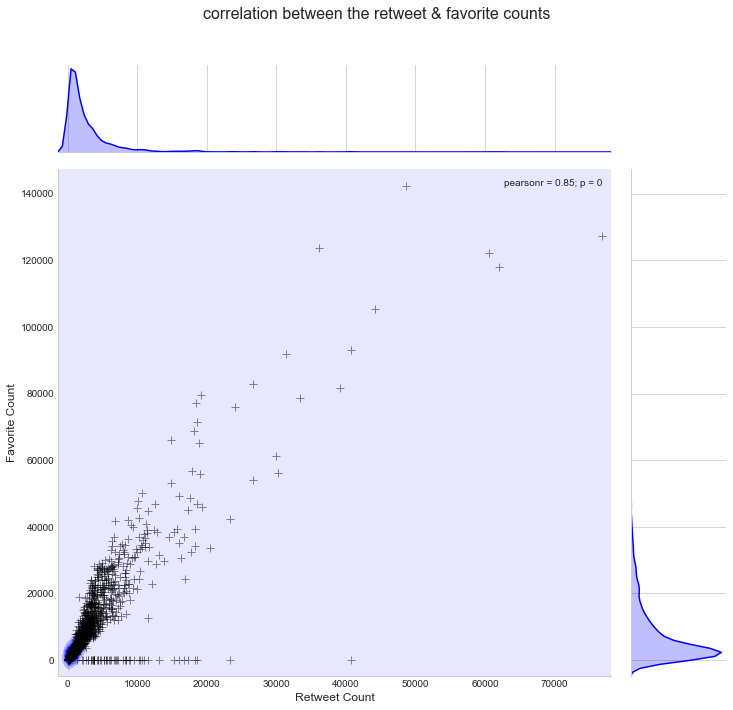

In [82]:
#Visualization comparing the favorite & retweet counts

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=merged_df_clean, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('correlation between the retweet & favorite counts',
                 fontsize=16)

Text(0.5,0.98,'Dog Gender Distribution')

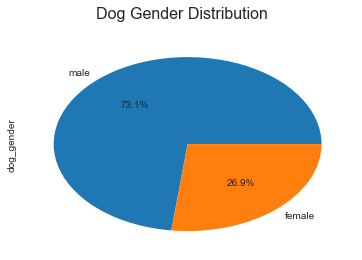

In [83]:
merged_df_clean[merged_df_clean['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.suptitle('Dog Gender Distribution',
                 fontsize=16)

In [89]:
df = merged_df_clean[['dog_gender', 'rating_numerator']][merged_df_clean.dog_gender.notnull()].groupby('dog_gender').mean()

Text(0,0.5,'rating numerator')

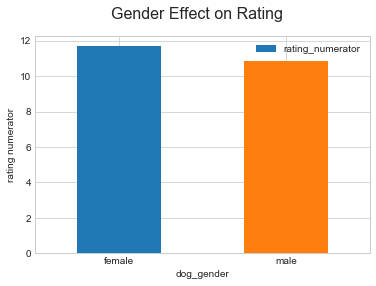

In [94]:
ax = df.plot.bar( y='rating_numerator', rot=0)
plt.suptitle('Gender Effect on Rating',
                 fontsize=16)

ax.set_ylabel("rating numerator")

(-1.2885797396652512,
 1.2370867742795675,
 -1.2200463336826606,
 1.2100248595007976)

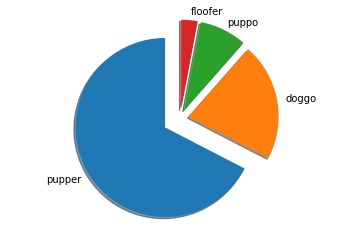

In [3]:
dog_stage_count = list(merged_df_clean[merged_df_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = merged_df_clean[merged_df_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal') 

Text(0.5,0.98,'BoxPlot of DogStage based on Rating')

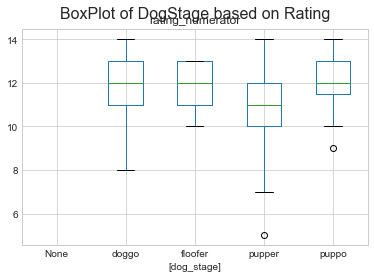

In [95]:
merged_df_clean[merged_df_clean['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])

plt.suptitle('BoxPlot of DogStage based on Rating',
                 fontsize=16)

# References

* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/pandas-docs/stable/merging.html
* https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
* https://github.com/tweepy/tweepy
* http://support.gnip.com/articles/identifying-and-understanding-retweets.html
* https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
